# Импортируем 16-битное монохромное изображение

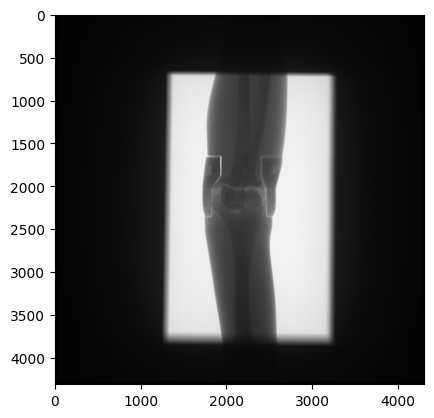

I;16B - тип изображения, (4308, 4308) - размер изображения, формат - TIFF


In [134]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\1.tiff"
imag = Image.open(path_elbow)
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
print(imag.mode, '- тип изображения,', imag.size, '- размер изображения,', 'формат -', imag.format)

Обрезаем тёмные края

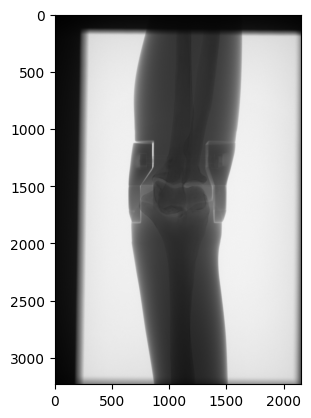

In [135]:
width=imag.width
height=imag.height
alfa=4
beta=8
xleft_base=width/alfa #Границы обрезки
yleft_base=height/beta
xright_base=height-xleft_base
yright_base=height-yleft_base
coordinates_crop = (xleft_base, yleft_base, xright_base, yright_base) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop)
plt.imshow(np.asarray(imag_1), cmap = 'gray')

Расчёт шума и среднего в выделенной области

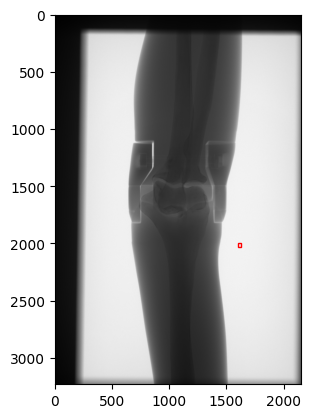

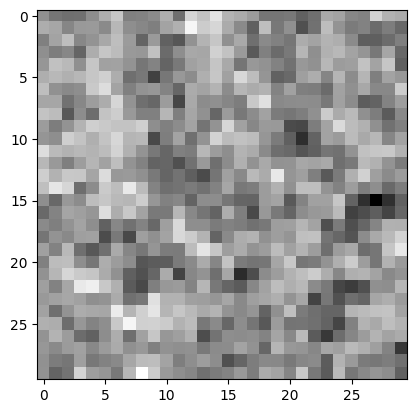

9743.59 - среднее значение
 51.08 Среднее квадратичное отклонение
 190.74 - отношение сигнал/шум


In [136]:
from matplotlib import patches
xleft=1600 #Координаты левого верхнего угла прямоугольника
yleft=2000
xright=xleft+30 #Размеры прямоугольника
yright=yleft+30
rect = patches.Rectangle(
    (xleft, yleft),           # левый верхний угол
    xright - xleft,            # ширина
    yright - yleft,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag_1), cmap = 'gray') 
plt.show()
coordinates = (xleft, yleft, xright, yright) # Ось y направлена вниз, ось x вправо
imag_region = imag_1.crop(coordinates) #Выделяем интересуемый нас регион
plt.imshow(np.asarray(imag_region), cmap = 'gray')
plt.show()
oblast=np.asarray(imag_region) #Считаем шум, среднее и СКО
mean=np.mean(oblast)
std=np.std(oblast)
print(round(mean,2), '- среднее значение\n', round(std,2),'Среднее квадратичное отклонение\n',
      round(mean/std,2), '- отношение сигнал/шум')

Теперь посчитаем SNR для пикселей из этой области для каждого из 10 снимков, + каждого пикселя в отдельности.

In [170]:
pixel_brightness=[]
j=20 #Выбор координат пикселя
k=0
for i in range(10):
    path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    imag_region_loop = img.crop(coordinates) #выбор области анализа
    oblast_loop=np.asarray(imag_region_loop)
    mean=np.mean(oblast_loop)
    std=np.std(oblast_loop)
    print(round(mean,2), '- средн.;', round(std,2),'- СКО;', round(mean/std,2), '- SNR')
    pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя
mean=np.mean(pixel_brightness)
std=np.std(pixel_brightness)
print('Для отдельного пикселя, его координаты из выбранной области', j, k, ':\n',
      round(mean,2), '- средн.;', round(std,2),'- СКО;', round(mean/std,2), '- SNR')

9743.59 - средн.; 51.08 - СКО; 190.74 - SNR
9760.13 - средн.; 55.58 - СКО; 175.62 - SNR
9786.72 - средн.; 51.05 - СКО; 191.69 - SNR
9774.22 - средн.; 52.49 - СКО; 186.21 - SNR
9758.59 - средн.; 59.15 - СКО; 164.99 - SNR
9765.85 - средн.; 52.76 - СКО; 185.1 - SNR
9787.63 - средн.; 53.3 - СКО; 183.65 - SNR
9735.63 - средн.; 57.06 - СКО; 170.62 - SNR
9781.96 - средн.; 52.26 - СКО; 187.2 - SNR
9747.79 - средн.; 57.03 - СКО; 170.93 - SNR
Для отдельного пикселя, его координаты из выбранной области 20 0 :
 9780.3 - средн.; 53.82 - СКО; 181.73 - SNR
